# <center> 👉 class_03_2 IP » _Arithmetic Operations - Synthesizing, Blending, Masking & Reversing_ </center>

# ▣ Arithmetic Operations on Images  

Learn several arithmetic operations on images like addition, subtraction, bitwise operations etc.  
You will learn these functions : 
* **cv2.add()**  
* **cv2.addWeighted()** etc.  

## ▶ Image Addition  
You can add two images by OpenCV function, cv2.add() or simply by numpy operation,   
- res = img1 + img2.  

Both images should be of same depth and type, or second image can just be a scalar value.  

~ Syntax:  
    
* **cv2.add(src1, src2, dst, mask, dtype):** 

~ Parameters:    
* src1: 1st img
* src2: 2nd img
* dst(optional): output img
* mask(optional): Computes only non-zero pixels with mask values
* dtype(optional): output data type (dtype)

### Note

There is a difference between OpenCV addition and Numpy addition.  
OpenCV addition is a saturated operation while Numpy addition is a modulo operation.

For example, consider below sample:

In [1]:
import cv2
import numpy as np

x = np.uint8([250])
y = np.uint8([10])
print('Numpy add x+y = ', x+y ) # 250+10 = 260 % 256 = 4
print('cv.add(x,y) = ', cv2.add(x,y) ) # 250+10 = 260 => 255

Numpy add x+y =  [4]
cv.add(x,y) =  [[255]]


It will be more visible when you add two images.  
OpenCV function will provide a better result.  
So always better stick to OpenCV functions.

## ▶ Image Subtraction 

~ Syntax:  
    
* **cv2.subtract(src1, src2, dst, mask, dtype):** 

~ Parameters: same as the cv2.add() 

## ▶ Image Multiply   

~ Syntax:  
    
* **cv2.multiply(src1, src2, dst, scale, dtype):** 

~ Parameters:  
    
* scale(optional): multiple value  

## ▶ Image Divide  

~ Syntax:  
    
* **cv2.divide(src1, src2, dst, scale, dtype):** 

~ Parameters: same as the cv2.multiply()

## ▶ Examples: 

In [2]:
# arithmatic.py

import cv2
import numpy as np

a = np.uint8([[200, 50]]) 
b = np.uint8([[100, 100]])

add1 = a + b  # NumPy operation
sub1 = a - b
mult1 = a * 2
div1 = a / 3

add2 = cv2.add(a, b)  # OpenCV API operation
sub2 = cv2.subtract(a, b)
mult2 = cv2.multiply(a , 2)
div2 = cv2.divide(a, 3)

print('a = ', a, 'b = ' , b)
print()
print('np a + b = ', add1, ',                  cv2.add(a, b) = ' , add2)
print('np a - b = ', sub1, ',                  cv2.subtract(a, b) = ', sub2)
print('np a * 2 = ', mult1, ',                  cv2.multiply(a, 2) =', mult2)
print('np a / 3 = ', div1, ',  cv2.divide(a, 3) = ', div2)

a =  [[200  50]] b =  [[100 100]]

np a + b =  [[ 44 150]] ,                  cv2.add(a, b) =  [[255 150]]
np a - b =  [[100 206]] ,                  cv2.subtract(a, b) =  [[100   0]]
np a * 2 =  [[144 100]] ,                  cv2.multiply(a, 2) = [[255 100]]
np a / 3 =  [[66.66666667 16.66666667]] ,  cv2.divide(a, 3) =  [[67 17]]


You can see that the numpy calculation results and the calculation results using the OpenCV calculation function are different.  
- The left side is the result of calculation with numpy, 
- and the right side is the result of calculation with the OpenCV function.

>- 200 + 100 = 300, which exceeds 255. The value range of the unit8 type is 0 to 255, so values exceeding 255 are counted from 0 again.
>- Calculating 200 + 100 with numpy is 300, which is 300 - 256 = 44.   

- On the other hand, if you use the cv2.add() function, 

>- all values exceeding 255 will be returned as 255.
>- 50 + 100 = 150, which has the same result whether numpy operation or cv2.add() operation. Because 150 does not exceed 255.  
>- Similarly, 50 - 100 = -50, but the result of numpy operation is 206. Because -50 + 256 = 206.  

- The result of calculation with cv2.subtract() is 0.   

>- This is because OpenCV returns all values less than 0 as 0.  

- Multiplication and division operations also do not take values greater than 255 or less than 0, and do not have decimal points.  

When you pass a third parameter to the cv2.add() function, it assigns the sum of the first and second parameters to the third parameter.  

Therefore, the results of the three codes below are the same:
- c = cv2.add(a, b): Add a and b and assign to c
- c = cv2.add(a, b, None): Add a and b and assign to None
- cv2.add(a, b, c): Add a and b and assign to c  
    
※ If a numpy array is passed to the fourth parameter, mask, the operation is performed only on pixels at positions (indexes) where the mask value is not 0.    

In [3]:
# arithmatic_mask and accumulating computation
import cv2
import numpy as np

a = np.array([[1, 2]], dtype=np.uint8) 
b = np.array([[10, 20]], dtype=np.uint8)
mask = np.array([[1, 0]], dtype=np.uint8) 
c1 = cv2.add(a, b, None, mask) # mask value (1, 0)
print(c1)

[[11  0]]


In [4]:
c2 = cv2.add(a, b, b.copy(), mask) # adds only the first element of a and b. the third parameter is b.copy() = [10, 20], leaving the second element of b alone. So the result is [[11, 20]].
print(c2, b.copy())

[[11 20]] [[10 20]]


In [5]:
c3 = cv2.add(a, b, b, mask) # adds only the first element of a and b -> 3rd b = (11, 0) -> b with mask(11,20) 
print(c3, b)

[[11 20]] [[11 20]]


Add only the first elements of a and b and apply to the first element of b,
Leave the second element of b alone. So the results [[11, 20]]

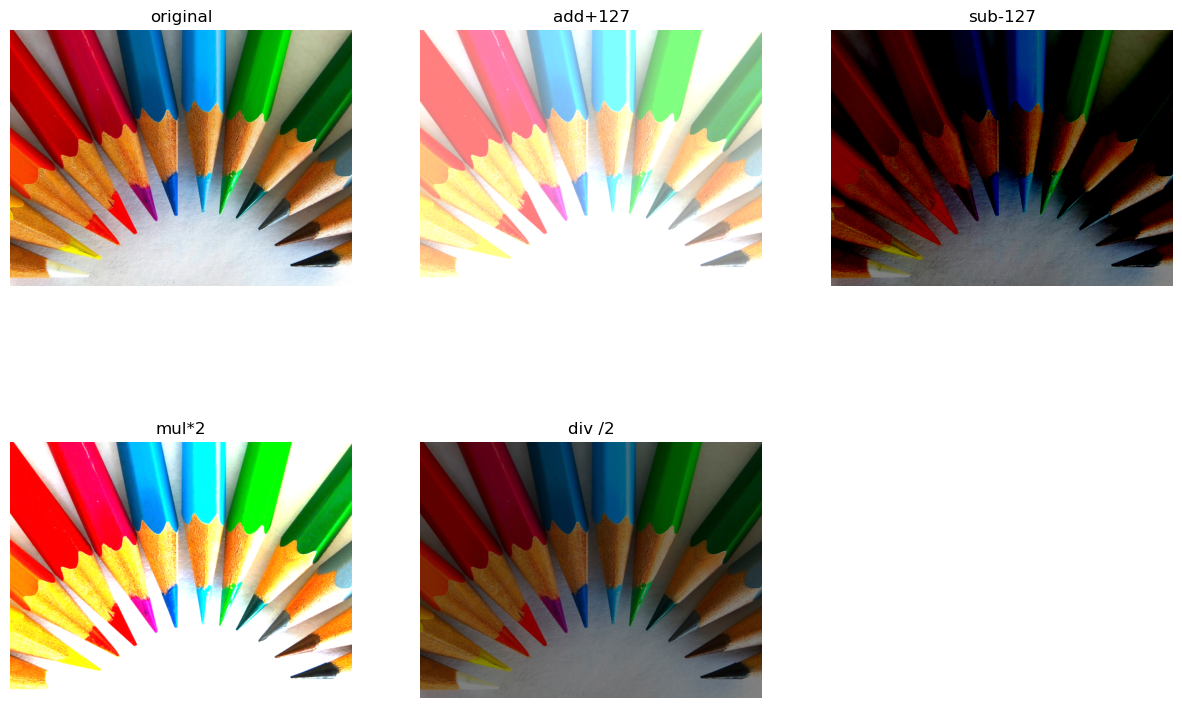

In [6]:
import numpy as np
import cv2

src = cv2.imread("./images/practice_img/pencil_small.jpg")
number1 = np.ones_like(src) * 127 # grey(127, 127, 127) 
number2 = np.ones_like(src) * 2   # black(2, 2, 2) 사용
img = src.copy()
add = cv2.add(src, number1)
sub = cv2.subtract(src, number1)
mul = cv2.multiply(src, number2)
div = cv2.divide(src, number2)

src = np.concatenate((src, src, src, src), axis = 1)
number = np.concatenate((number1, number1, number2, number2), axis = 1)
dst = np.concatenate((add, sub, mul, div), axis = 1)

dst = np.concatenate((src, number, dst), axis = 0)

cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=100)

titles = ['original', 'add+127', 'sub-127','mul*2','div /2']
images = [img, add, sub, mul, div ]

for i in range(5):
    plt.subplot(2, 3, i+1), plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i]), plt.axis('off')
plt.show()

## ▶ Image Compare  

There is no subtraction taking place only comparison  
cv2.compare performs an element-wise comparison. In simple words, given the following instance:  
- **cv2.compare(A, B, cv2.CMP_GT)**  

every element in array A is compared with every element in array B.   
The flag cv2.CMP_GT is used to check whether the element in A is greater than of B in each comparison. It returns another array containing 0 and 255; where
>- 0 -> element in A is not greater than that in B  
>- 255 -> element in A is greater than that in B  

OpenCV limits the range between 0-255 internally.

In [7]:
import numpy as np
import cv2

src = cv2.imread("./images/practice_img/pencil_small.jpg")
number = np.ones_like(src) * 127
img = src.copy()
_max = cv2.max(src, number) 
_min = cv2.min(src, number) 
_abs = cv2.absdiff(src, number) 
compare1 = cv2.compare(src, number, cv2.CMP_GT) #  src > number True : 255,  False: 0
# compare2 = cv2.compare(src, number, cv2.CMP_LT) #  src < number

src = np.concatenate((src, src, src, src), axis = 1)
number = np.concatenate((number, number, number, number), axis = 1)
dst = np.concatenate((_max, _min, _abs, compare1), axis = 1)

dst = np.concatenate((src, number, dst), axis = 0)

cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=100)

titles = ['original', '_max>127', '_min<127','_abs diff', 'compare1:GT', 'compare2:LT']
images = [img, _max, _min, _abs, compare1, compare2 ]

for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i]), plt.axis('off')
plt.show()

NameError: name 'compare2' is not defined

<Figure size 1500x1000 with 0 Axes>

- The maximum (minimum) value function calculates the maximum (minimum) value for each element of the two images.
- If the comparison result is True, change the value of the element to 255,   
- and if the comparison result is False, change the value of the element to 0.

### ● flags  

Flag   | Meaning   
-------|--------
cv2.CMP_EQ|src = number
cv2.CMP_NE|src ≠ number
cv2.CMP_GT|src > number
cv2.CMP_GE|src ≧ number
cv2.CMP_LT|src < number
cv2.CMP_LE|src ≦ number

When compositing two images, neither the sum of numpy nor the cv2.add() function seen above will give you good results.
If you perform numpy's summation, if the pixel value is greater than 255, the image will be close to black because it will only have an excess value.

For example, if you add 150 and 180 together, you get 330, so the final result is 74, which is the excess value at 255. This will cause some areas to be overwhelmed.
On the other hand, if you do the cv2.add() operation, most of the pixel values will be close to 255. Thus, the image will be white overall.

The code below shows such an example.

In [8]:
# blending_simple

import cv2
import numpy as np
import matplotlib.pylab as plt

img1 = cv2.imread('./images/practice_img/wing_wall.jpg')
img2 = cv2.imread('./images/practice_img/yate.jpg')

print(img1.shape, img2.shape)

(480, 640, 3) (480, 640, 3)


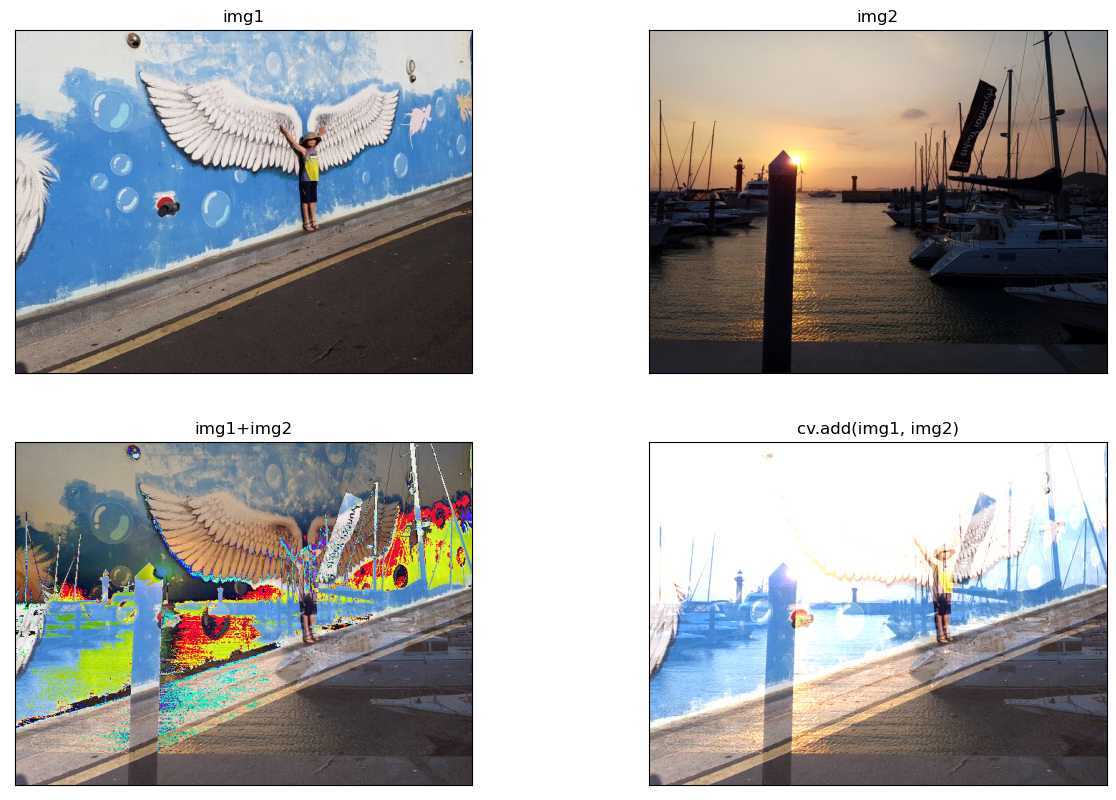

In [9]:
img3 = img1 + img2  
img4 = cv2.add(img1, img2) 
figure(figsize=(15, 10), dpi=100)

imgs = {'img1':img1, 'img2':img2, 'img1+img2': img3, 'cv.add(img1, img2)': img4}

for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2, i + 1)
    plt.imshow(v[:,:,::-1])
    plt.title(k)
    plt.xticks([]); plt.yticks([])

plt.show()

## ▶ Weighted Image Blending  

This is also image addition, but different weights(alpha) are given to images so that it gives a feeling of blending or transparency.  
Images are added as per the equation below:  

$$ g(x) = (1 - \alpha)f_{0}(x) + \alpha f_{1}(x) $$

By varying $\alpha$ from 0 $\rightarrow$ 1, you can perform a cool transition between one image to another.  
Here I took two images to blend them together.  
First image is given a weight of 0.7 and second image is given 0.3.  
cv2.addWeighted() applies following equation on the image.  

$$ dst = \alpha \cdot img1 + \beta \cdot img2 + \gamma $$

Here $\gamma$ is taken as zero.

~ Syntax:  
    
* **cv2.addWeight(img1, alpha, img2, beta, gamma)**  

~ Parameters: 
    
- img1, img2: imgs
- alpha: weight value to img_1
- beta: weight value to img_2 (1-alpha) 
- gamma: constant value, 0 

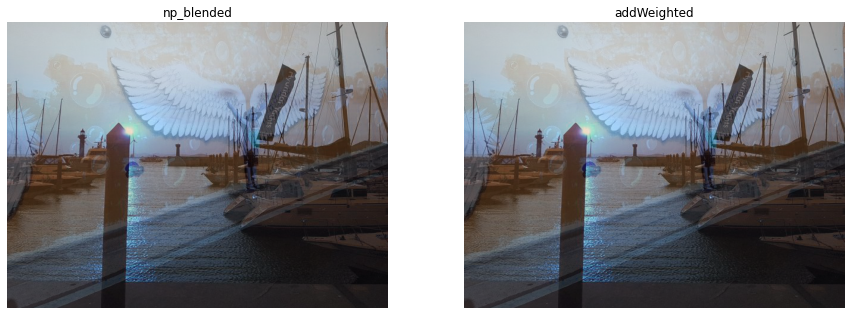

In [18]:
# blending_alpha.py

import cv2
import numpy as np

alpha = 0.3 

img1 = cv2.imread('./images/practice_img/wing_wall.jpg')
img2 = cv2.imread('./images/practice_img/yate.jpg')

blended = img1 * alpha + img2 * (1-alpha) # equation
blended = blended.astype(np.uint8) 
cv2.imshow('img1 * alpha + img2 * (1-alpha)', blended)

dst = cv2.addWeighted(img1, alpha, img2, (1-alpha), 0) # opencv
cv2.imshow('cv2.addWeighted', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

fig, axs = plt.subplots(1,2,figsize=(15,10))
axs[0].imshow(blended), axs[0].axis('off'), axs[0].set_title('np_blended')
axs[1].imshow(dst), axs[1].axis('off'), axs[1].set_title('addWeighted')

plt.show()

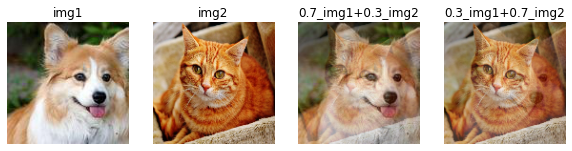

In [11]:
# Weighted Image Blending

img1 = cv2.imread('./images/dogs/04.jpg')
img2 = cv2.imread('./images/cats/cat.jpg')
img2_resized = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2RGB)

dst1 = cv2.addWeighted(img1,0.7,img2,0.3,0)
dst2 = cv2.addWeighted(img1,0.3,img2,0.7,0)

fig, axs = plt.subplots(1,4,figsize=(10,10))
axs[0].imshow(img1), axs[0].axis('off'), axs[0].set_title('img1')
axs[1].imshow(img2), axs[1].axis('off'), axs[1].set_title('img2')
axs[2].imshow(dst1), axs[2].axis('off'), axs[2].set_title('0.7_img1+0.3_img2')
axs[3].imshow(dst2), axs[3].axis('off'), axs[3].set_title('0.3_img1+0.7_img2')

plt.show()

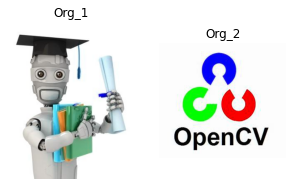

In [12]:
# Example 2
img1 = cv2.imread('./images/ml.png')
img2 = cv2.imread('./images/OIP.png')

fig, axs = plt.subplots(1,2,figsize=(5,5))
axs[0].imshow(img1), axs[0].axis('off'), axs[0].set_title('Org_1')
axs[1].imshow(img2), axs[1].axis('off'), axs[1].set_title('Org_2')

plt.show()

In [14]:
img1.shape, img2.shape # check img size and make same shape

((475, 640, 3), (475, 640, 3))

In [15]:
img2_resized = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

In [16]:
img1.shape, img2_resized.shape

((475, 640, 3), (475, 640, 3))

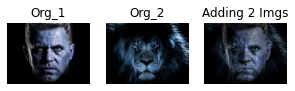

In [17]:
dst = cv2.addWeighted(img1,0.6,img2_resized,0.4,0)

fig, axs = plt.subplots(1,3,figsize=(5,5))
axs[0].imshow(img1), axs[0].axis('off'), axs[0].set_title('Org_1')
axs[1].imshow(img2), axs[1].axis('off'), axs[1].set_title('Org_2')
axs[2].imshow(dst), axs[2].axis('off'), axs[2].set_title('Adding 2 Imgs')

plt.imshow(img1)
plt.imshow(img2)
plt.imshow(dst)
plt.show()

## ▶ Blending with Alpha Trackbar

Moving the trackbar to adjust the alpha value to synthesize the image

In [25]:
# blending_alpha_trackbar.py
import cv2
import numpy as np

win_name = 'Alpha blending'     
trackbar_name = 'fade'          

def onChange(x):
    alpha = x/100
    dst = cv2.addWeighted(img1, 1-alpha, img2, alpha, 0) 
    cv2.imshow(win_name, dst)

img1 = cv2.imread('./images/practice_img/man_face.jpg')
img2 = cv2.imread('./images/practice_img/lion_face.jpg')

cv2.imshow(win_name, img1)
cv2.createTrackbar(trackbar_name, win_name, 0, 100, onChange)

cv2.waitKey()
cv2.destroyAllWindows()

## ▶ Bitwise arithmetics  

Bitwise arithmetic helps with selective computations, such as selecting only certain regions or excluding only certain regions when compositing two images.   

<img src = './images/practice_img/bitwise.jpeg' width=400 height=400> 


 https://slideplayer.com/slide/5378944/  

~ Syntax:  
    
>- cv2.bitwise_and(img1, img2, mask=None)  
>- cv2.bitwise_or(img1, img2, mask=None)
>- cv2.bitwise_xor(img1, img2, mask=None)  
>- cv2.bitwise_not(img1, img2, mask=None)  

~ Parameters:  

>- img1, img2 : same shape imgs
>- mask : calulate only not 0 pxls

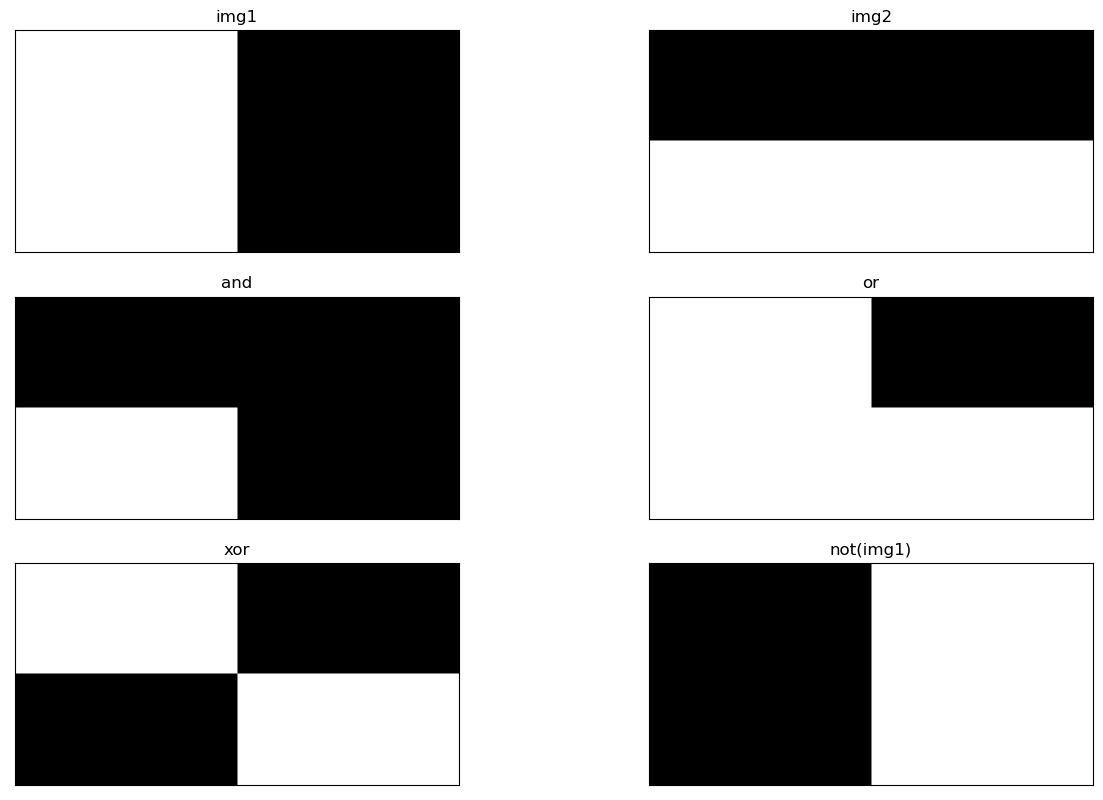

In [26]:
# bitwise.py
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=100)

img1 = np.zeros((200,400), dtype=np.uint8) # all black img
img2 = np.zeros((200,400), dtype=np.uint8)
img1[:, :200] = 255         # left half white(255), right half black(0)
img2[100:200, :] = 255      # above half black(0), bottom half white(255)

bitAnd = cv2.bitwise_and(img1, img2)
bitOr = cv2.bitwise_or(img1, img2)
bitXor = cv2.bitwise_xor(img1, img2)
bitNot = cv2.bitwise_not(img1)

imgs = {'img1':img1, 'img2':img2, 'and':bitAnd, 'or':bitOr, 'xor':bitXor, 'not(img1)':bitNot}
for i, (title, img) in enumerate(imgs.items()):
    plt.subplot(3,2,i+1)
    plt.title(title)
    plt.imshow(img, 'gray')
    plt.xticks([]); plt.yticks([])

plt.show()

0 is black, 255 is white.   
- Substituting a boolean value is False for 0 and True for a non-zero value.   
- Therefore, black is 0, which means False, and white is 255, which means True.   
- Both values must be true in order for the AND operation of two values to be True.   
- Therefore, after the AND operation, only the white part of img1 and img2 overlaps in white.

    0은 검은색, 255은 흰색입니다.   
    - 불리언(boolean) 값으로 치환하면 0은 False, 0이 아닌 값은 True입니다.   
    - 따라서 검은색은 0이므로 False를 의미하고, 흰색은 255이므로 True를 의미합니다.   
    - 두 값의 AND 연산 결과 True가 되기 위해서는 두 값 모두 True여야 합니다.   
    - 따라서 AND 연산 후에는 img1과 img2의 흰색 부분이 겹치는 곳만 흰색으로 표시됩니다.

An example of using bitwise operation to remove a part of an image into the desired shape
비트와이즈 연산으로 이미지 일부분을 원하는 모양으로 떼어내는 예제

### ● Bitwise masking

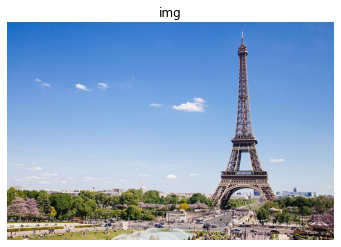

In [27]:
# bitwise_masking.py

import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('./images/practice_img/eiffel_tower.jpg')

cv2.imshow('img', img)

cv2.waitKey()
cv2.destroyAllWindows()

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('img')
plt.show()

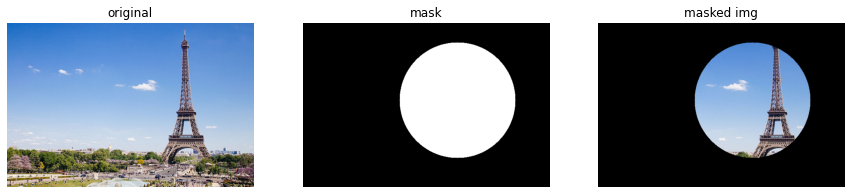

In [28]:
mask = np.zeros_like(img) # all 0 black img
cv2.circle(mask, (400,200), 150, (255,255,255), -1) # mask area : 255 (white, filled circle)
masked = cv2.bitwise_and(img, mask) # only the both area has pxl values : true

cv2.imshow('original', img)
cv2.imshow('mask', mask)
cv2.imshow('masked', masked)
cv2.waitKey()
cv2.destroyAllWindows()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
masked = cv2.cvtColor(masked, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1,3,figsize=(15,10))
axs[0].imshow(img), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(mask), axs[1].axis('off'), axs[1].set_title('mask')
axs[2].imshow(masked), axs[2].axis('off'), axs[2].set_title('masked img')
plt.show()

## ▶ Masked Blending Img 

Let's learn how to combine two images (4 channels) with a background and a foreground (the object image). 

● Typically, one image is divided into a background and a foreground (the actual image, not the background). 
- For example, consider an image of a dog on green grass.   
- The green grass is in the background, the dog is in the foreground.   
- What if what we want is a puppy instead of green grass? 
- Only puppies should be extracted from the image. 

● First of all, let's use an image with a transparent background and composit. 
- In the BGRA color format, A (alpha) is 0 for the background and A (alpha) is 255 for the foreground. 
- This is because A is transparent if it is 0, and it is opaque if it is 255.   
- With BGRA, you can easily cut out the background. 

     ● 배경과 전경(배경이 아닌 실제 이미지)이 있는 4 채널의 두 이미지를 합성하는 방법에 대해 배워보겠습니다. 
    일반적으로 하나의 이미지는 배경과 전경(배경이 아닌 실제 이미지)으로 나뉩니다. 
    예를 들어 푸른 잔디에 강아지가 있는 이미지를 생각해봅시다. 푸른 잔디는 배경이고, 강아지는 전경입니다. 
    우리가 원하는 게 푸른 잔디가 아닌 강아지라면 어떻게 해야 할까요? 
    이미지에서 강아지만을 추출해야 합니다. 

    • 우선 배경이 투명한 이미지를 활용하여 합성해보겠습니다.   
    • BGRA 색상 형식으로 표현할 때, 배경은 A(알파, alpha)가 0이고, 전경은 A(알파)가 255입니다.   
    • A가 0이면 투명하고, 255면 불투명하기 때문입니다. BGRA를 활용하면 배경을 손쉽게 오려낼 수 있습니다.   

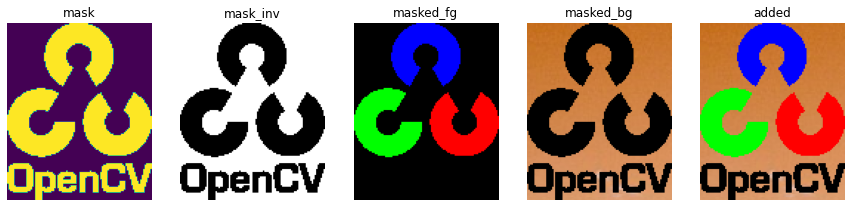

In [29]:
#  combine_rgba_mask.py 투명 배경 PNG 파일을 이용한 합성

import cv2
import numpy as np

img_fg = cv2.imread('./images/practice_img/opencv_logo.png', cv2.IMREAD_UNCHANGED) # 4 chnl png file
img_bg = cv2.imread('./images/practice_img/eiffel_tower.jpg')

_, mask = cv2.threshold(img_fg[:,:,3], 1, 255, cv2.THRESH_BINARY) # cv2.threshold(img, threshold_value, value, flag)
# If it is greater than threshold, it is value, or replace it with 0.
mask_inv = cv2.bitwise_not(mask)

img_fg = cv2.cvtColor(img_fg, cv2.COLOR_BGRA2BGR) 
h, w = img_fg.shape[:2]
roi = img_bg[10:10+h, 10:10+w ]

masked_fg = cv2.bitwise_and(img_fg, img_fg, mask=mask) 
masked_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)

added = masked_fg + masked_bg      
img_bg[10:10+h, 10:10+w] = added

cv2.imshow('mask', mask)
cv2.imshow('mask_inv', mask_inv)
cv2.imshow('masked_fg', masked_fg)
cv2.imshow('masked_bg', masked_bg)
cv2.imshow('added', added)
cv2.imshow('result', img_bg)
cv2.waitKey()
cv2.destroyAllWindows()

fig, axs = plt.subplots(1,5,figsize=(15,10))
axs[0].imshow(mask), axs[0].axis('off'), axs[0].set_title('mask')
axs[1].imshow(mask_inv,cmap='gray'), axs[1].axis('off'), axs[1].set_title('mask_inv')
axs[2].imshow(masked_fg), axs[2].axis('off'), axs[2].set_title('masked_fg')
axs[3].imshow(masked_bg), axs[3].axis('off'), axs[3].set_title('masked_bg')
axs[4].imshow(added), axs[4].axis('off'), axs[4].set_title('added')
plt.show()

In [ ]:
plt.imshow(cv2.cvtColor(img_bg, cv2.COLOR_BGR2RGB)),plt.axis('off'), plt.title('result')
plt.show()

● cv2.threshod(img_fg[:, :, 3], 1, 255, cv2.THRESH_BINARY)
- cv2.threshold(img, threshold_value, value, flag)
- If it is greater than threshold, it is value, or replace it with 0.
- Create a mask that separates the background from the foreground

● The image that says OpenCV has a transparent background.   
- Therefore, the background part has an A value of 0 in BRGA. 
- On the other hand, the foreground part, not the background, is not a zero.   
- So, if A is more than 1, it will be 255, and if it is less than 1, it will be 0,   
- and the background will be black and the foreground will be white. 

● mask_inv = cv2.bitwise_not (mask), so mask_inv is the opposite of mask.
- That is, the background is white and the foreground is black.   
- These two masks were used to composite the Paris image and the OpenCV image

    ● cv2.threshold(img, threshold_value, value, flag)로 전경을 분리하는 마스크를 만듭니다.  
    - OpenCV라고 쓰여있는 이미지는 배경이 투명합니다.   
    - 따라서 배경 부분은 BRGA의 A값이 0입니다. 
    - 반면 배경이 아닌 전경 부분은 A가 0이 아닙니다.   
    - 따라서 A가 1 이상이면 255, 1 미만이면 0으로 바꾸어주면 배경은 검은색, 전경은 흰색이 됩니다.  

    ● mask_inv = cv2.bitwise_not(mask)이므로 mask_inv는 mask의 반대입니다. 
    - 즉, 배경은 흰색, 전경은 검은색입니다.   
    - 이 두 mask를 활용하여 파리 이미지와 OpenCV 이미지를 합성했습니다.

## ▶ Chroma key Masking and Blending  

The color-based masking method is called chroma key.  
For example, an actor shoots a green background and then later composites the green background with another background.   

색상을 이용한 마스킹 방식을 **크로마키(chroma key)**라고 합니다.  
예를 들어, 초록색 배경을 두고 배우가 촬영한 뒤 나중에 초록색 배경은 다른 배경과 합성하는 방식입니다.   

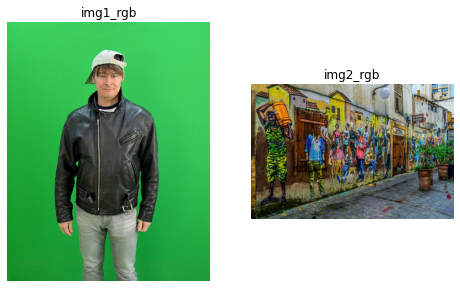

In [20]:
# chromakey.py

import cv2
import numpy as np
import matplotlib.pylab as plt

img1 = cv2.imread('./images/practice_img/man_chromakey.jpg')
img2 = cv2.imread('./images/practice_img/street.jpg')

img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
fig, axs = plt.subplots(1,2,figsize=(8,8))
axs[0].imshow(img1_rgb), axs[0].axis('off'), axs[0].set_title('img1_rgb')
axs[1].imshow(img2_rgb), axs[1].axis('off'), axs[1].set_title('img2_rgb')

plt.show()

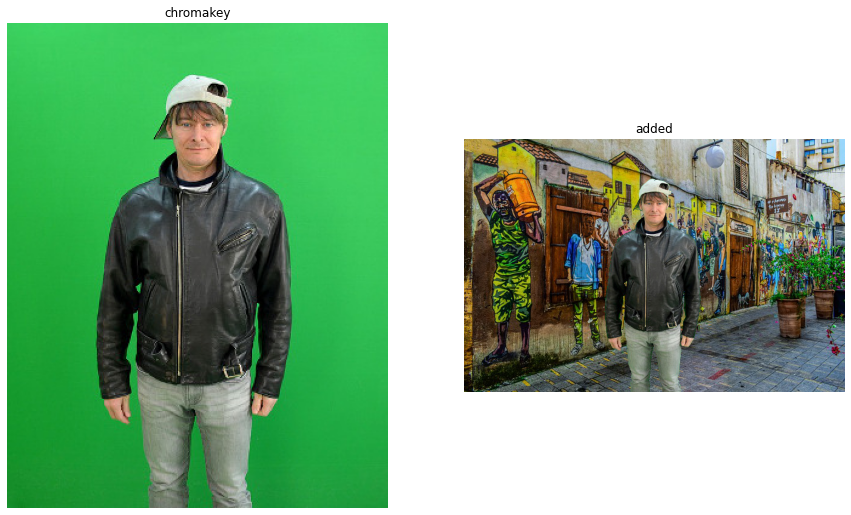

In [21]:
height1, width1 = img1.shape[:2]
height2, width2 = img2.shape[:2]
x = (width2 - width1)//2
y = height2 - height1
w = x + width1
h = y + height1

chromakey = img1[:10, :10, :] # chromakey ROI with 10 pxls
offset = 20

hsv_chroma = cv2.cvtColor(chromakey, cv2.COLOR_BGR2HSV) # change to HSV
hsv_img = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

#chroma_h = hsv_chroma[0]
chroma_h = hsv_chroma[:,:,0]
lower = np.array([chroma_h.min()-offset, 100, 100])
upper = np.array([chroma_h.max()+offset, 255, 255])

mask = cv2.inRange(hsv_img, lower, upper)
mask_inv = cv2.bitwise_not(mask)
roi = img2[y:h, x:w]
fg = cv2.bitwise_and(img1, img1, mask=mask_inv)
bg = cv2.bitwise_and(roi, roi, mask=mask)
img2[y:h, x:w] = fg + bg

cv2.imshow('chromakey', img1)
cv2.imshow('added', img2)
cv2.waitKey()
cv2.destroyAllWindows()

img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
fig, axs = plt.subplots(1,2,figsize=(15,10))
axs[0].imshow(img1_rgb), axs[0].axis('off'), axs[0].set_title('chromakey')
axs[1].imshow(img2_rgb), axs[1].axis('off'), axs[1].set_title('added')

plt.show()

## ▶ **cv2.seamlessClone()**  

Image synthesis requires blending and masking as you see the above.   
However, choosing alpha values for blending, coordinates for masking, and color selection takes a lot of time.  

In OpenCV, there is a function called **cv2.seamlessClone()**, which functions to synthesize the characteristics of two images by itself.
-  There is no need to select alpha values for blending, coordinates for masking, and color selection

There is a function called cv2.seamlessClone()**, which functions to combine the characteristics of two images on its own.

    이미지 합성에는 블렌딩과 마스킹이 필요합니다.   
    하지만, 블렌딩을 위한 알파 값 선택과 마스킹을 위한 좌표, 색상 선택에는 많은 시간이 소요됩니다.  
    **cv2.seamlessClone()**이라는 함수가 있는데 이는 두 이미지의 특징을 살려 알아서 합성하는 기능을 합니다.

~ Syntax:
- **dst = cv2.seamlessClone(src, dst, mask, coords, flags, output)**

~ Parameters:  
    
>- src: input img, foreground
>- dst: out img, background
>- mask: mask, The area you want to synthesize in src is 255, and the rest is 0
>- coords: The coordinates of the dst where src wants to be placed. (center)
>- flags: Synthesis method
>>- cv2.NORMAL_CLONE : Preserve the input source  
>>- cv2.MIXED_CLONE : Mix inputs and targets       
>- output(optional): result


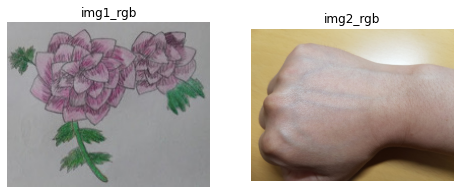

In [22]:
# seamlessclone.py

import cv2
import numpy as np
import matplotlib.pylab as plt
 
img1 = cv2.imread("./images/practice_img/drawing.jpg")
img2= cv2.imread("./images/practice_img/my_hand.jpg")
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
fig, axs = plt.subplots(1,2,figsize=(8,8))
axs[0].imshow(img1_rgb), axs[0].axis('off'), axs[0].set_title('img1_rgb')
axs[1].imshow(img2_rgb), axs[1].axis('off'), axs[1].set_title('img2_rgb')

plt.show()

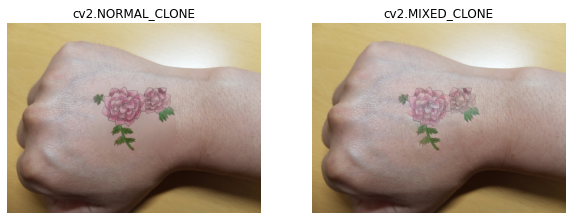

In [23]:
mask = np.full_like(img1, 255)
 
height, width = img2.shape[:2] 
center = (width//2, height//2) # img center

normal = cv2.seamlessClone(img1, img2, mask, center, cv2.NORMAL_CLONE) # seamlessClone
mixed = cv2.seamlessClone(img1, img2, mask, center, cv2.MIXED_CLONE)

cv2.imshow('normal', normal)
cv2.imshow('mixed', mixed)
cv2.waitKey()
cv2.destroyAllWindows()

normal_rgb = cv2.cvtColor(normal, cv2.COLOR_BGR2RGB)
mixed_rgb = cv2.cvtColor(mixed, cv2.COLOR_BGR2RGB)
fig, axs = plt.subplots(1,2,figsize=(10,10))
axs[0].imshow(normal_rgb), axs[0].axis('off'), axs[0].set_title('cv2.NORMAL_CLONE')
axs[1].imshow(mixed_rgb), axs[1].axis('off'), axs[1].set_title('cv2.MIXED_CLONE')

plt.show()

## ▶ Find the difference between two images  

Subtracting the pixel values of the two images gives a negative number, so you need to take the absolute value.  

~ Syntax:  
    
* **diff = cv2.absdiff(img1, img2)**  

~ Parameters: 
    
- img1, img2: imgs
- diff: absolute value

~ Example: 

In [ ]:
# diff_absolute.py
import cv2
import numpy as np

img1 = cv2.imread('./images/practice_img/robot_arm1.jpg')
img2 = cv2.imread('./images/practice_img/robot_arm2.jpg')
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

diff = cv2.absdiff(img1_gray, img2_gray) # find differences of imgs

_, diff = cv2.threshold(diff, 1, 255, cv2.THRESH_BINARY) # threshold and (inc differences)
diff_red = cv2.cvtColor(diff, cv2.COLOR_GRAY2BGR)  # convert to color
diff_red[:,:,2] = 0

spot = cv2.bitwise_xor(img2, diff_red) # marking on spot

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('diff', diff)
cv2.imshow('spot', spot)
cv2.waitKey()
cv2.destroyAllWindows()

import matplotlib.pylab as plt

spot_rgb = cv2.cvtColor(spot, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs[0, 0].imshow(img1),axs[0, 0].axis('off'),axs[0, 0].set_title('Original img1')
axs[0, 1].imshow(img2),axs[0, 1].axis('off'),axs[0, 1].set_title('Original img2')
axs[1, 0].imshow(diff,cmap='gray'), axs[1, 0].axis('off'), axs[1, 0].set_title('Differences')
axs[1, 1].imshow(spot_rgb), axs[1, 1].axis('off'), axs[1, 1].set_title('Different Spot')

plt.show()

## ▶ Reverse Image  

Reverse Image is used to convert a video or image to an inverted color.  
Each pixel is subjected to a bitwise operation, among which the NOT operation is applied.  
The NOT operation is an operation that reverses the value of each digit.  
>- If you apply the NOT operation to a pixel with a value of 153, it will be changed to a value of 102.
>>- 153 has a value of 0b10011001, and 102 has a value of 0b01100110.
>- That is, you change the pixel value of the decimal digit to the value of the binary number, and then reverse the value of each digit.
>- 1 becomes 0, 0 changes to 1.  

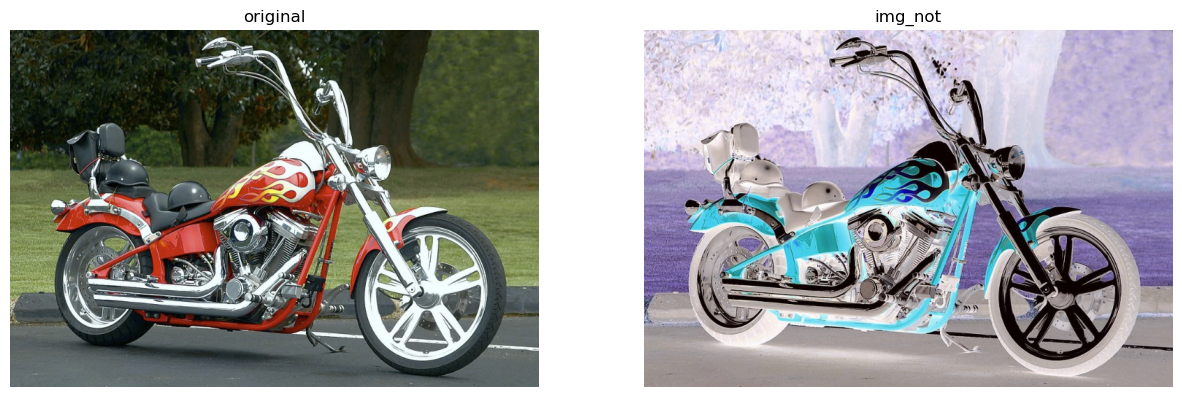

In [24]:
import cv2
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

src1 = cv2.imread("./images/practice_img/motorcycle.jpg", cv2.IMREAD_COLOR) # pencil_small.jpg motorcycle.jpg butterfly.webp
# src2 = cv2.imread("./images/practice_img/pistol.png", cv2.IMREAD_COLOR) 

img_not = cv2.bitwise_not(src1)
# img_and = cv2.bitwise_and(src1,src2)
# img_or = cv2.bitwise_or(src1,src2)
# img_xor = cv2.bitwise_xor(src1,src2)

figure(figsize=(15, 10), dpi=100)

plt.subplot(121),plt.imshow(cv2.cvtColor(src1, cv2.COLOR_BGR2RGB)),plt.title('original'),plt.axis('off')
plt.subplot(122),plt.imshow(cv2.cvtColor(img_not, cv2.COLOR_BGR2RGB)),plt.title('img_not'),plt.axis('off')
plt.show()